In [78]:
import pickle as p
import random
import copy
import pandas as pd
import scipy as sp
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance
from sklearn import metrics
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [30]:
state_center = p.load( open( "state_center.p", "rb" ) )
state_pop = p.load(open("state_population.p", "rb"))

In [31]:
states = {}
for state in state_center:
    value = copy.deepcopy(state_center[state])
    value.append(state_pop[state])
    states[state] = value

In [74]:
df = pd.DataFrame.from_dict(states, orient='index', dtype = float)
df[2] = df[2].apply(lambda x: float(x.replace(',', '')))
df[:5]

,0,1,2
New Hampshire,43.452492,-71.563896,2371.0
Nebraska,41.125370,-98.268082,352.0
Louisiana,31.169546,-91.867805,2406.0
South Carolina,33.856892,-80.945007,3075.0
Illinois,40.349457,-88.986137,5213.0


In [75]:
x_train = preprocessing.scale(df.values)
x_train

array([[  6.63533713e-01,   1.14018416e+00,  -3.30309750e-01],
       [  2.76309044e-01,  -2.58071355e-01,  -4.71158215e-01],
       [ -1.38030400e+00,   7.70529827e-02,  -3.27868098e-01],
       [ -9.33139361e-01,   6.48980642e-01,  -2.81197656e-01],
       [  1.47199932e-01,   2.27939746e-01,  -1.32047573e-01],
       [  8.04519699e-01,  -3.19372683e-01,  -4.89784535e-01],
       [ -1.10789233e+00,   3.42872313e-01,  -4.37463411e-01],
       [ -1.56116869e-01,  -1.77351983e-01,  -4.30905830e-01],
       [ -1.91573441e-01,  -1.24179109e+00,  -2.34317929e-01],
       [ -3.05678543e+00,  -3.35942149e+00,  -4.24487773e-01],
       [  1.34183523e+00,  -3.37446831e-01,  -4.49532150e-01],
       [  1.14016334e-01,  -9.69884017e-01,  -2.68431301e-01],
       [ -2.82122688e-01,   7.94284213e-01,  -5.97048993e-02],
       [ -6.67044412e-02,   8.65906976e-01,  -2.01214046e-03],
       [  1.03658807e+00,  -2.93646532e-02,  -3.26612391e-01],
       [  1.87350545e-01,   8.44561841e-01,   9.4747057

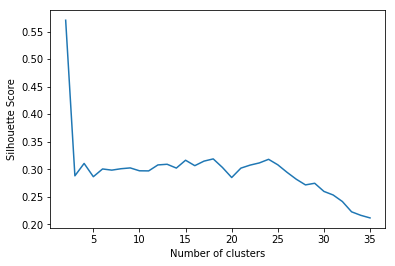

The best numbers of hierarchical clusters: 18
labels: [16  5 12 13 17  5 12 11 10 18  6 10 17 17  4 17 13  4 14 17 15  5  7 12 13
  9  7  7 16  1 11 17  6  4  5 17 15 16  8  9 17 16 13 15  3 11 17  2 11 10
 17]


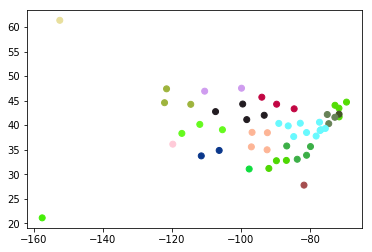

In [82]:
Z = hierarchy.linkage(x_train, method='ward', metric='euclidean')

# find the best number of clusters
max_clusters = 35
s_hier = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(Z, k, criterion='maxclust')
    s_hier[k] = metrics.silhouette_score(x_train,clusters,metric='euclidean')


plt.plot(range(2,len(s_hier)),s_hier[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# the best number of clusters
best_n_hierarchical_clusters = s_hier[5:].argmax() + 5
print ('The best numbers of hierarchical clusters: {0}'.format(best_n_hierarchical_clusters))

# hierarchical clustering based on the best number of clusters
hierarchical = hierarchy.fcluster(Z, best_n_hierarchical_clusters, criterion='maxclust')
print ('labels: {0}'.format(hierarchical))

colors_hier = [(random.random(), random.random(), random.random()) for i in range(best_n_hierarchical_clusters)]
hierarchical_shifted = [x-1 for x in hierarchical]
label_color_hier = [colors_hier[i] for i in hierarchical_shifted]
plt.scatter(df[1].values, df[0].values, c=label_color_hier)
plt.show()

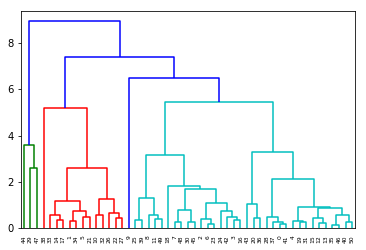

In [90]:
R = hierarchy.dendrogram(Z,truncate_mode='level', show_leaf_counts=True)
# R_20ng
# plt.figure(figsize=(14,4))
plt.show()

### Interpretation
